# Facial Emotion Recognition

Bu çalışmada amacım duyguları taklit eden farklı insanların görsellerinden bir model oluşturarak modelin duyguyu tanımlamasını sağlamak.

# Introduction

Veri seti, **8 farklı duygu** (nötr, öfke, küçümseme, tiksinti, korku, mutluluk, üzüntü ve şaşkınlık) sergileyen kişilerin görüntülerinden oluşmaktadır. Veri setindeki her görüntü, bu belirli duygulardan birini temsil ederek araştırmacıların ve makine öğrenimi uygulayıcılarının duygu tanıma ve analizi için modeller geliştirmelerine ve incelemelerine olanak tanır.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F618942%2Fe72fc2820f1452bcdc99b4bc69e4c7b0%2FMacBook%20Air%20-%201.png?generation=1689578335866939&alt=media)

**Content**

Resimler: Kişilere karşılık gelen ve 8 farklı taklit edilmiş duyguya sahip resimler içeren klasörleri içerir, her dosya ifade edilen duyguya göre adlandırılır.
.csv dosyası: Veri kümesindeki kişiler hakkında bilgi içerir

**Veri setinde kullanılan tanımlı duygular:**

-neutral

-anger

-contempt

-disgust

-fear

-happy

-sad

-surprised

**File with the extension .csv**

Aşağıdaki bilgiler csv belgesinde bulunmaktadır:

-set_id: görsel setinin id'si

-gender: bireyin cinsiyeti

-age: bireyin yaşı

-country: bireyin ülkesi

# Importing Libraries and Dataset

Bu bölümde veri setini, kullanacağım kütükaneleri ve bu veri seti içerisinde bulunan dokümanları yükledim.

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-recognition/emotions.csv
/kaggle/input/facial-emotion-recognition/images/7/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/7/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/7/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/7/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/7/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/7/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/7/Fear.jpg
/kaggle/input/facial-emotion-recognition/images/7/Contempt.jpg
/kaggle/input/facial-emotion-recognition/images/17/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/17/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/17/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/17/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/17/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/17/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/17/Fear.jpg
/kaggle/input/facial-emoti

## Defining Constants

Bu bölümde modeli eğitmek için kullanacağım 8 farklı duyguyu tanımladım.

In [44]:
DATA_DIR = '/kaggle/input/facial-emotion-recognition/images/'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

## Load and Preprocess images

Bu bölümde veri setimde bulunan 153 adet görsel veriyi yükledim. Renkli kullanmak istediğim için de 3 kanallı RGB'ye çevirdim. X ve Y değişkenlerimi tanımlayarak verileri normalize ettim.

In [45]:
def load_data_rgb_with_filenames():
    images = []
    labels = []
    filenames = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if not os.path.isdir(emotion_dir):
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
            continue

        for img_file in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_file)

            # Her zaman 3 kanallı BGR olarak oku ve RGB'ye çevir
            img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)   # 3 kanallı
            if img_bgr is None:
                continue
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

            img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
            images.append(img_resized)
            labels.append(emotion_label)
            filenames.append(img_file)

    images = np.array(images, dtype=np.float32) / 255.0  # (N,H,W,3)
    labels = np.array(labels, dtype=np.int64)
    filenames = np.array(filenames)
    return images, labels, filenames

images, labels, filenames = load_data_rgb_with_filenames()

import numpy as np
images = np.asarray(images, dtype=np.float32)   # (N, H, W, 3) bekleniyor
labels = np.asarray(labels, dtype=np.int64)     # (N,)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42,stratify=labels)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# 4) Control
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0]  == y_test.shape[0]

X_train: (51, 48, 48, 3) y_train: (51,)
X_test : (13, 48, 48, 3) y_test : (13,)


## Visualization

Yukarıda RGB'ye çevirdiğim 153 görsel veriyi görselleştirdim. Bu görselleştirmede 64 adetlik bir örneklem oluşturdum.

Number of images: 64
Shape of images array: (64, 48, 48, 3)
Number of labels: 64


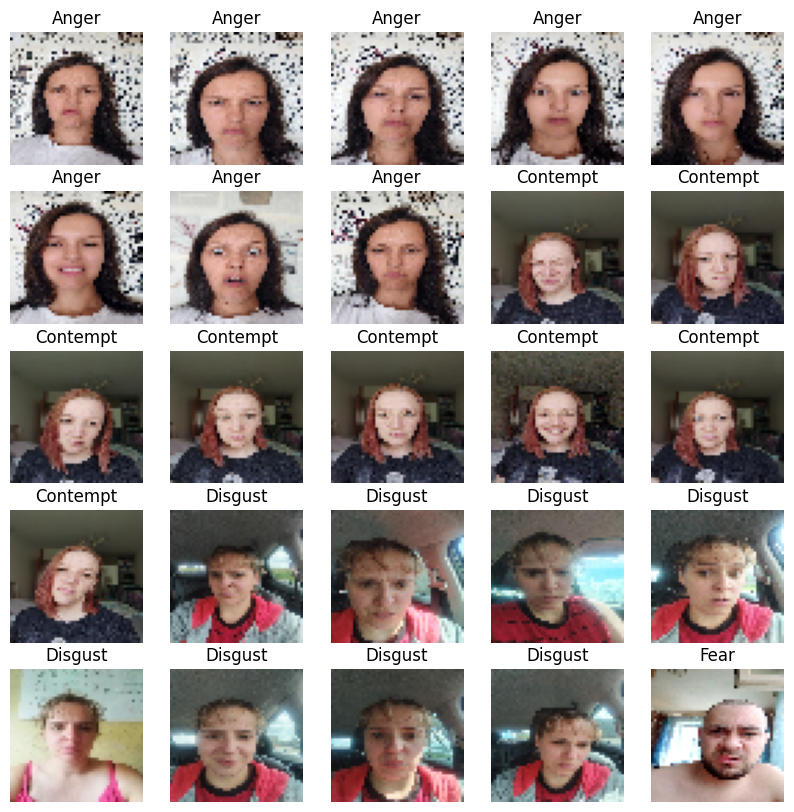

In [46]:
# Print information about the dataset
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

# Create Model for Facial Recognition

Sequential modelini kullanarak modelimi eğittim. Görüntüleri küçülttüm MaxPooling ile. Modeli derleyip eğiterek tutarlılık ve kayıp oranlarını çıkardım.

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = len(EMOTIONS)

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.1070 - loss: 2.0799 - val_accuracy: 0.0769 - val_loss: 2.0795
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1436 - loss: 2.0798 - val_accuracy: 0.0769 - val_loss: 2.0802
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1436 - loss: 2.0792 - val_accuracy: 0.0769 - val_loss: 2.0809
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1332 - loss: 2.0789 - val_accuracy: 0.0769 - val_loss: 2.0812
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1123 - loss: 2.0792 - val_accuracy: 0.0769 - val_loss: 2.0816
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1332 - loss: 2.0786 - val_accuracy: 0.0769 - val_loss: 2.0829
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1332 - loss: 2.0784 - val_accuracy: 0.0769 - val_loss: 2.0839
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1332 - loss: 2.0772 - val_accuracy: 0.0769 - val_loss: 2.0852

# Evaluation of the Model

Oluşturduğum modelin doğruluk ve kayıp oranlarını test edebilmek için test setimi tanımladım. Ardından bu iki değişkeni ilişkisini görebilmek için grafik olarak yazdırdım. 

Test loss: 2.0447
Test accuracy: 0.1538
accuracy: 0.1538
loss: 2.0447


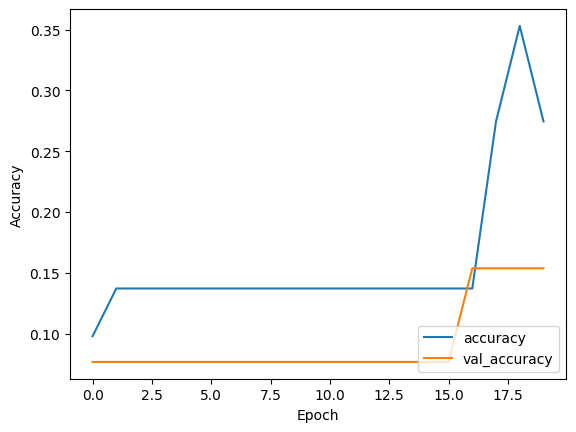

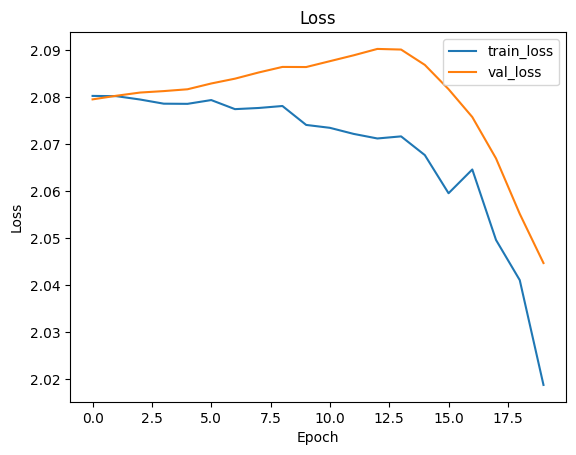

In [48]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

results = model.evaluate(X_test, y_test, return_dict=True, verbose=0)
for k, v in results.items():
    print(f"{k}: {v:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

## Saving Model

Derleyip eğittiğim modelimi testlerimi gerçekleştirdikten sonra kaydettim.

In [49]:
model.save('/kaggle/working/emotion_detection_model_1.h5')

# Evaluate Model

Modelimi değerlendirmek için test seti üzerinde yeni modeller oluşturdum. Doğru ve yanlış tahmin örneklerini görmek için modelimi değerlendirdim. Sınıflandırma ve karmaşıklık raporlarımı oluşturup modeli değerlendirdim. Model tahmin edemediği yerlerde uyarı vermemesi için zero_division=0 kullandım ve etiket listesini verdim. Böylece güvenilir rapor oluşturmasını sağlamaya çalıştım.  

=== Test Metrics ===
accuracy: 0.1538
loss: 2.0447
Support (true counts)   : [1 1 2 2 2 1 2 2]
Predicted (counts)      : [ 0  2  0  0  0 11  0  0]

=== Classification Report ===
              precision    recall  f1-score   support

       Anger     0.0000    0.0000    0.0000         1
    Contempt     0.5000    1.0000    0.6667         1
     Disgust     0.0000    0.0000    0.0000         2
        Fear     0.0000    0.0000    0.0000         2
       Happy     0.0000    0.0000    0.0000         2
     Neutral     0.0909    1.0000    0.1667         1
         Sad     0.0000    0.0000    0.0000         2
   Surprised     0.0000    0.0000    0.0000         2

    accuracy                         0.1538        13
   macro avg     0.0739    0.2500    0.1042        13
weighted avg     0.0455    0.1538    0.0641        13



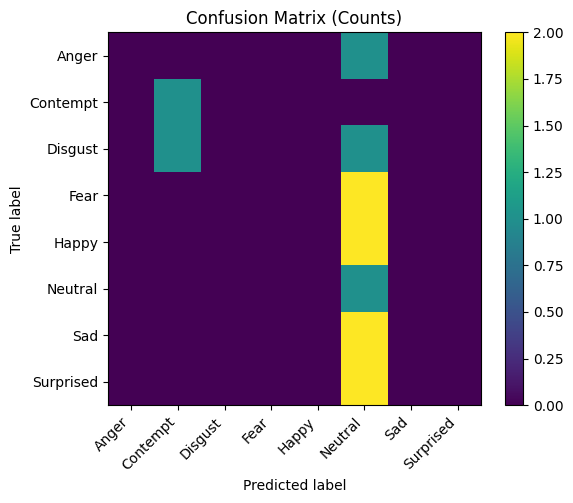

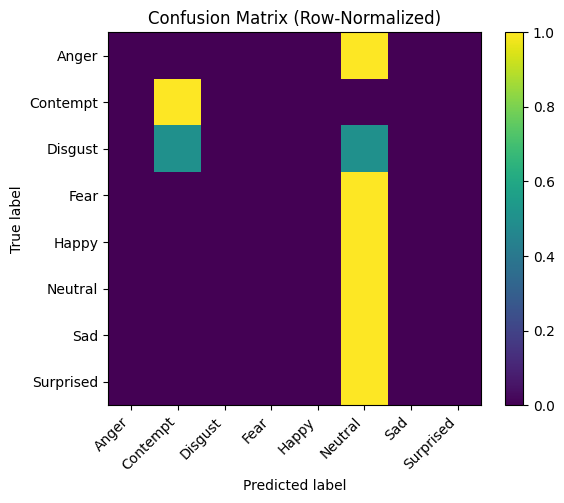

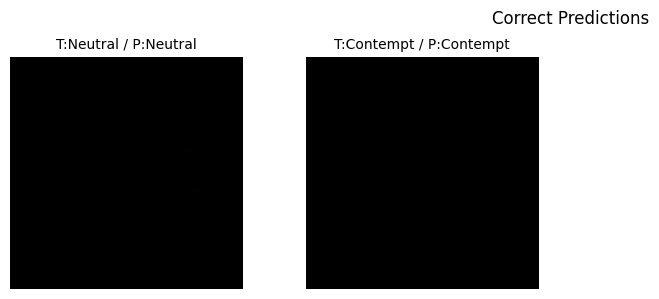

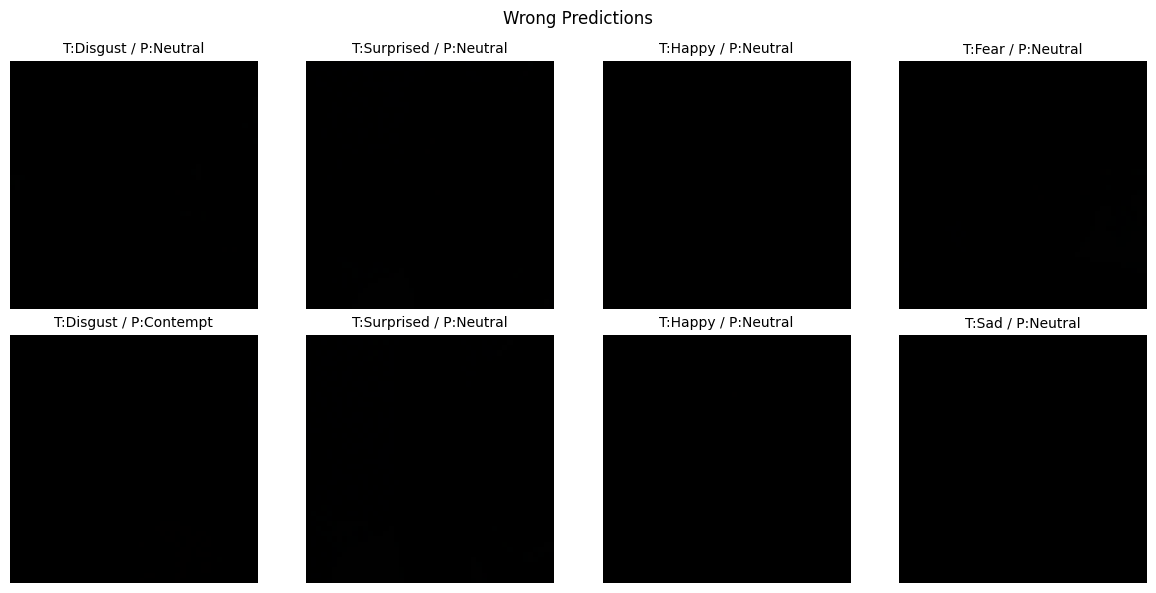

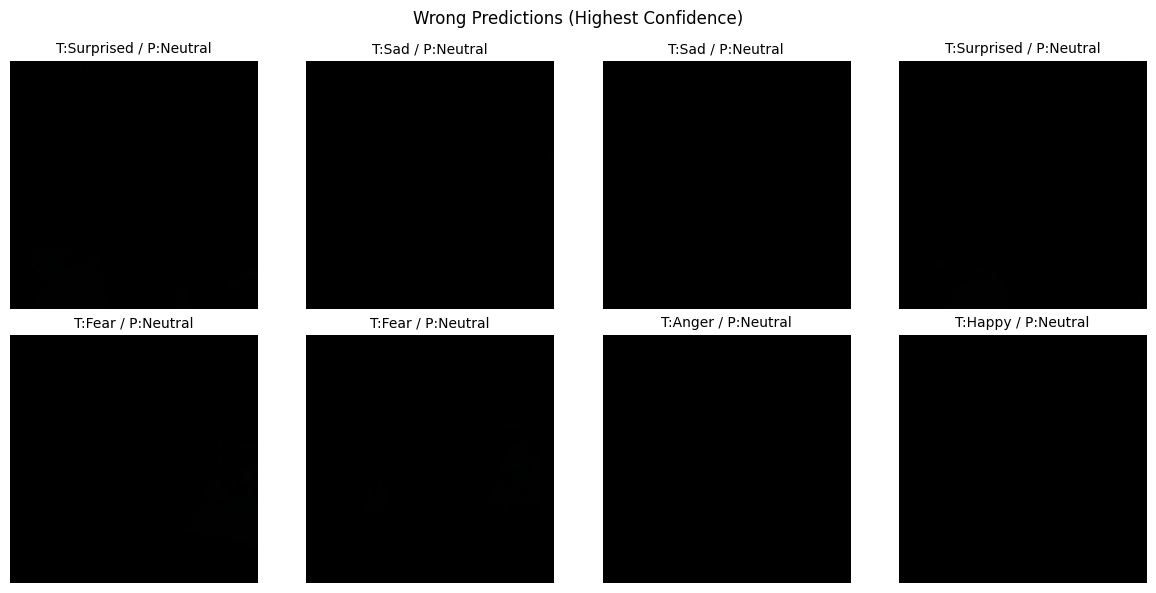

In [50]:
# ===========================
# Evaluation Suite (paste & run)
# ===========================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import math

# ---------------------------
# 0) Güvenlik/Yardımcılar
# ---------------------------
# Sınıf isimlerini belirle
try:
    class_names = list(EMOTIONS)
except NameError:
    # EMOTIONS yoksa, y_test'teki benzersiz sınıflardan üretelim
    uniq = sorted(list(set(int(x) for x in np.array(y_test).ravel())))
    class_names = [str(i) for i in uniq]

num_classes = len(class_names)

def show_examples(X, y_true, y_pred, idxs, title, max_n=8):
   # Doğru/yanlış örnekleri görselleştir.
    if len(idxs) == 0:
        print(f"{title}: Örnek bulunamadı.")
        return
    n = min(max_n, len(idxs))
    cols = 4
    rows = math.ceil(n / cols)
    plt.figure(figsize=(cols * 3, rows * 3))
    for i, idx in enumerate(idxs[:n]):
        ax = plt.subplot(rows, cols, i + 1)
        img = X[idx]
        # Görüntünün renk kanalı durumuna göre göster
        if img.ndim == 3 and img.shape[-1] == 1:
            ax.imshow(img.squeeze(), cmap='gray', vmin=0.0, vmax=1.0)
        else:
            ax.imshow(np.clip(img, 0.0, 1.0))
        true_lbl = class_names[int(y_true[idx])]
        pred_lbl = class_names[int(y_pred[idx])]
        ax.set_title(f"T:{true_lbl} / P:{pred_lbl}", fontsize=10)
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, labels, title="Confusion Matrix"):
    """Ham sayım matrisi görselleştir."""
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right')
    plt.yticks(tick_marks, labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

# ---------------------------
# 1) Test seti üzerinde değerlendirme
# ---------------------------
results = model.evaluate(X_test, y_test, return_dict=True, verbose=0)
print("=== Test Metrics ===")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

# ---------------------------
# 2) Tahminler
# ---------------------------
y_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.array(y_test).ravel().astype(int)

# ---------------------------
# 3) Sınıflandırma raporu

# --- Dağılımları kontrol et ---
import numpy as np
from sklearn.metrics import classification_report

y_true = np.array(y_test).ravel().astype(int)
# y_pred zaten önceki adımda hesaplandıysa kullan; yoksa:
# y_prob = model.predict(X_test, verbose=0)
# y_pred = np.argmax(y_prob, axis=1)

num_classes = len(set(y_true) | set(y_pred))
print("Support (true counts)   :", np.bincount(y_true, minlength=num_classes))
print("Predicted (counts)      :", np.bincount(y_pred, minlength=num_classes))

# Raporu güvenli üret (isimler ve etiketler tutarlı)
labels_for_report = sorted(set(y_true) | set(y_pred))
names_for_report  = [class_names[i] if i < len(class_names) else str(i) for i in labels_for_report]

print("\n=== Classification Report ===")
print(classification_report(
    y_true, y_pred,
    labels=labels_for_report,        # raporlanacak sınıfları açıkça ver
    target_names=names_for_report,   # okunaklı isimler
    digits=4,
    zero_division=0                  # tanımsız metrikleri 0.0 yap ve uyarıyı sustur
))

# ---------------------------
# 4) Karmaşıklık (Confusion) matrisi
# ---------------------------
# Etiketleri 0..num_classes-1 aralığına göre hesaplayalım
labels_for_cm = sorted(list(set(y_true) | set(y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels_for_cm)
# Görselleştir (ham)
labels_to_show = [class_names[i] if i < len(class_names) else str(i) for i in labels_for_cm]
plot_confusion_matrix(cm, labels_to_show, title="Confusion Matrix (Counts)")

# Normalize ederek (satır bazlı) de gösterelim
with np.errstate(invalid='ignore'):
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)  # 0/0 olasılığını 0 yap
plot_confusion_matrix(cm_norm, labels_to_show, title="Confusion Matrix (Row-Normalized)")

# ---------------------------
# 5) Doğru ve Yanlış tahmin örnekleri
# ---------------------------
correct_idx = np.where(y_pred == y_true)[0]
wrong_idx   = np.where(y_pred != y_true)[0]

# Doğru örnekler
show_examples(X_test, y_true, y_pred, correct_idx, title="Correct Predictions", max_n=8)

# Yanlış örnekler
show_examples(X_test, y_true, y_pred, wrong_idx, title="Wrong Predictions", max_n=8)

# ---------------------------
# 6) (Opsiyonel) En emin olunan yanlışlar
# ---------------------------
if len(wrong_idx) > 0:
    wrong_conf = y_prob[wrong_idx, y_pred[wrong_idx]]  # modelin yanlıştaki güveni
    topk = np.argsort(-wrong_conf)[:8]
    hardest = wrong_idx[topk]
    show_examples(X_test, y_true, y_pred, hardest, title="Wrong Predictions (Highest Confidence)", max_n=8)
else:
    print("Yanlış tahmin yok; 'en emin olunan yanlışlar' gösterilemedi.")

# Loading the model and Predicting

Yukarıda kaydettiğim modeli kullanarak ön belleğe yükledim. Giren görüntüyü modelde tanımladığım forma dönüştürmesini sağlayıp tahminde bulunmasını sağladım. Görselleri RGB'ye dönüştürerek kullandığım için burada tekrar yüklenen görseli RGB'ye çevirdim. En olası sonucu duygularda tanımladığım kategoride duygu etiketini yazdırdım.

In [51]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# (Varsayım: IMG_SIZE ve EMOTIONS notebook'ta zaten tanımlı)
# Örn: IMG_SIZE = 48

# Load the saved model
model = load_model('/kaggle/working/emotion_detection_model_1.h5')

# Preprocess function
def preprocess_image(img_path):
    # 1) Read (BGR) + existence check
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Image not found: {img_path}")

    # 2) Convert to RGB (eğitimi RGB ile yaptıysan şart)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 3) Resize to model input size
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # 4) dtype + normalize to [0,1]
    img = img.astype(np.float32) / 255.0

    # 5) Add batch dimension -> (1, H, W, 3)
    img = np.expand_dims(img, axis=0)
    return img

# Path to input image
input_img_path = '/kaggle/input/facial-emotion-recognition/images/0/Anger.jpg'

# Preprocess & predict
input_img = preprocess_image(input_img_path)
predictions = model.predict(input_img, verbose=0)

# Decode prediction
pred_idx = int(np.argmax(predictions[0]))
predicted_label = EMOTIONS[pred_idx] if isinstance(EMOTIONS, (list, tuple)) and pred_idx < len(EMOTIONS) else str(pred_idx)

print("Predicted emotion:", predicted_label)

Predicted emotion: Neutral
